In [2]:
%matplotlib inline
import pandas as pd
import requests
import time
from bs4 import BeautifulSoup
import re
import numpy as np
import re
import heapq
import datetime
import matplotlib.pyplot as plt

# Web Scraping
Web Scraping is a hugely important tool for efficiently obtaining data from the web.  For companies without a huge or efficient data warehouse (many of these are sports teams and companies), this is an excellent data mining tool.  Python's modules requests and BeautifulSoup are some of the best programming libraries for web scraping.  We run through exercises/examples here.

In [1]:
if __name__ == "__main__":

    #header data for scraping: may be necessary to scrape
    #COPY AND PASTE INTO YOUR SCRIPT
    header_data = { # this is pulled from the py goldsberry library
                'Accept-Encoding': 'gzip, deflate, sdch',
                'Accept-Language': 'en-US,en;q=0.8',
                'Upgrade-Insecure-Requests': '1',
                'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64)'\
                ' AppleWebKit/537.36 (KHTML, like Gecko) Chrome/48.0.2564.82 '\
                'Safari/537.36',
                'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9'\
                ',image/webp,*/*;q=0.8',
                'Cache-Control': 'max-age=0',
                'Connection': 'keep-alive'
            }

Now that we have this tedious stuff out of the way, we can start the scraping process.  We'll use our very own UCLA Professor Virtanen's personal website to practice.  First, we use requests to obtain the HTML code.

In [3]:
url = "http://www.math.ucla.edu/~virtanen/40a.1.18s/schedule/schedule.php"
response = requests.get(url)
response

<Response [200]>

We now use BeautifulSoup to make sense of this code.  That's when we can really start digging into the content.

In [147]:
soup = BeautifulSoup(response.content) #becomes the actual code of the website
soup

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">\n<html xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta content="text/html; charset=unicode-escape" http-equiv="content-type"/>\n<meta content="Jukka Virtanen" name="author"/>\n<meta content="mathematics,UCLA" name="keywords"/>\n<title>Jukka Virtanen</title>\n<script type="text/javascript"></script>\n<style media="screen" title="currentStyle" type="text/css"></style>\n<link href="../website_files/40a-css.css" rel="stylesheet" type="text/css"/>\n</head>\n<body id="homepage">\n<div id="container">\n<div id="title"><span id="title_part_1">PIC 40A</span> <span id="title_part_2">Lecture 1</span><span id="title_part_3">UCLA Mathematics</span></div>\n<div id="zcontent">\n<ul id="nav">\n<li id="nav0"><a href="http://www.math.ucla.edu/~virtanen/40a.1.18s/index.php" title="Home">Home</a></li>\n<li id="nav1"><a href="http://www.math.ucla.edu/~virtanen/40a.1.18s/schedule/

Now that we have the code, we can start finding certain elements and obtaining relevant data.  Let's toy around with it for a bit.

In [6]:
soup2 = soup.find("title")
soup2

<title>Jukka Virtanen</title>

If we want just the content, we can use get_text().strip() to remove the tags.

In [148]:
soup2.get_text().strip()

u'Jukka Virtanen'

Now let's find something with an attribute.

In [149]:
soup3 = soup.find("ul", {"id": "nav"})
soup3

<ul id="nav">\n<li id="nav0"><a href="http://www.math.ucla.edu/~virtanen/40a.1.18s/index.php" title="Home">Home</a></li>\n<li id="nav1"><a href="http://www.math.ucla.edu/~virtanen/40a.1.18s/schedule/schedule.php" title="Schedule">Schedule</a></li>\n<li id="nav2"><a href="http://www.math.ucla.edu/~virtanen/40a.1.18s/assignments/hwassignments.php" title="Homework Assignments">Homework Assignments</a></li>\n<li id="nav4"><a href="http://www.math.ucla.edu/~virtanen/40a.1.18s/labs/labs.php" title="Labs">Labs</a></li>\n</ul>

Within soup3, we can find certain elements.  Let's see what content we can find from soup3.

In [150]:
soup4 = soup3.findAll("li")
list_elements = [] #a list with no elements.  We will append to this in the next loop.

for el in soup4:
    list_elements.append(el.get_text().strip()) #append is the function to add an element to the end of a list

for element in list_elements:
    print element

Home
Schedule
Homework Assignments
Labs


We've got the content from soup3.  Now, let's practice using a very important tool: regular expressions.  Let's try and only get everything that starts with 'Home'.

In [151]:
list_elements = []
re_group = []
for el in soup4:
    m = re.search('Home(.*)', el.get_text().strip()) #could use .* or \w*\s*\w*
    if m:
        list_elements.append(el.get_text().strip())
        re_group.append(m.group(1)) #obtains whatever is matched from our first term parentheses term
print (list_elements, re_group)

([u'Home', u'Homework Assignments'], [u'', u'work Assignments'])


Regular Expressions filtered out the other content to just leave us with everything that started with 'Home'.  Using parentheses allows us to obtain a match group from our regular expression search.  This is very useful when we want to format certain pieces of data in a particular way, or if we're only looking for a particular part of the data.

Let's try using findAll.

In [152]:
soup5 = soup.findAll("ul")
soup5

[<ul id="nav">\n<li id="nav0"><a href="http://www.math.ucla.edu/~virtanen/40a.1.18s/index.php" title="Home">Home</a></li>\n<li id="nav1"><a href="http://www.math.ucla.edu/~virtanen/40a.1.18s/schedule/schedule.php" title="Schedule">Schedule</a></li>\n<li id="nav2"><a href="http://www.math.ucla.edu/~virtanen/40a.1.18s/assignments/hwassignments.php" title="Homework Assignments">Homework Assignments</a></li>\n<li id="nav4"><a href="http://www.math.ucla.edu/~virtanen/40a.1.18s/labs/labs.php" title="Labs">Labs</a></li>\n</ul>,
 <ul>\n<li><a href="http://www.math.ucla.edu/~virtanen">Prof. Virtanen's math page</a> </li>\n<li><a href="http://www.math.ucla.edu/~virtanen/40a.1.18s/examples/examples.php" title="Examples">Examples</a></li>\n<li><a href="http://www.math.ucla.edu/~virtanen/40a.1.18s/helpful_links/helpful_links.php" title="Helpful Links">Helpful Links</a></li>\n</ul>,
 <ul>\n<li><b>04/02/2018 <a href="lec1.pdf">Lecture 1: Internet and how it works, WWW, URL, TCP/IP Protocols</a></b></

findAll returns a list of all the HTML code in ul tags.  This list is like any other Python list, and we can loop through it and manipulate it.

In [153]:
len(soup5) #the length of the list

12

In [154]:
soup5[0] #first element of the list

<ul id="nav">\n<li id="nav0"><a href="http://www.math.ucla.edu/~virtanen/40a.1.18s/index.php" title="Home">Home</a></li>\n<li id="nav1"><a href="http://www.math.ucla.edu/~virtanen/40a.1.18s/schedule/schedule.php" title="Schedule">Schedule</a></li>\n<li id="nav2"><a href="http://www.math.ucla.edu/~virtanen/40a.1.18s/assignments/hwassignments.php" title="Homework Assignments">Homework Assignments</a></li>\n<li id="nav4"><a href="http://www.math.ucla.edu/~virtanen/40a.1.18s/labs/labs.php" title="Labs">Labs</a></li>\n</ul>

In [155]:
soup5[11] #last element of the list

<ul>\n<li><b>06/04/2018 <a href="lec24.pdf">Lecture 27: Intro to XML</a></b></li>\n<li><b>06/06/2018 <a href="lec25.pdf">Lecture 28: XML DTDs</a></b></li>\n<li><b>06/08/2018 <a href="lec19b_regular_expressions.pdf">Lecture 29: Regular expressions</a></b></li>\n</ul>

In [156]:
soup5[-1] #also the last element of the list.  Negative indexing allows us to search backwards through a list.

<ul>\n<li><b>06/04/2018 <a href="lec24.pdf">Lecture 27: Intro to XML</a></b></li>\n<li><b>06/06/2018 <a href="lec25.pdf">Lecture 28: XML DTDs</a></b></li>\n<li><b>06/08/2018 <a href="lec19b_regular_expressions.pdf">Lecture 29: Regular expressions</a></b></li>\n</ul>

In [157]:
soup5[0:-10] #the first two elements of the list.

[<ul id="nav">\n<li id="nav0"><a href="http://www.math.ucla.edu/~virtanen/40a.1.18s/index.php" title="Home">Home</a></li>\n<li id="nav1"><a href="http://www.math.ucla.edu/~virtanen/40a.1.18s/schedule/schedule.php" title="Schedule">Schedule</a></li>\n<li id="nav2"><a href="http://www.math.ucla.edu/~virtanen/40a.1.18s/assignments/hwassignments.php" title="Homework Assignments">Homework Assignments</a></li>\n<li id="nav4"><a href="http://www.math.ucla.edu/~virtanen/40a.1.18s/labs/labs.php" title="Labs">Labs</a></li>\n</ul>,
 <ul>\n<li><a href="http://www.math.ucla.edu/~virtanen">Prof. Virtanen's math page</a> </li>\n<li><a href="http://www.math.ucla.edu/~virtanen/40a.1.18s/examples/examples.php" title="Examples">Examples</a></li>\n<li><a href="http://www.math.ucla.edu/~virtanen/40a.1.18s/helpful_links/helpful_links.php" title="Helpful Links">Helpful Links</a></li>\n</ul>]

In [158]:
soup5[12] #out of index range. Last index is len(list)-1, like other programming languages

IndexError: list index out of range

As an exercise, let's try to get all the lecture information on Professor Virtanen's website.  We can see that it is in an unordered list, but there are 11 other unordered lists.  Let's find a parent tag that will allow us to more easily find the unordered list we're seeking.

In [159]:
soup6 = soup.find('div', {'id': 'preamble'}) #contains the unordered list
soup6

<div id="preamble">\n<h2>Winter 2018 Tentative Course Outline</h2>\n<h3>Week 1</h3><ul>\n<li><b>04/02/2018 <a href="lec1.pdf">Lecture 1: Internet and how it works, WWW, URL, TCP/IP Protocols</a></b></li>\n<li>Reading: Skim chapter 1 (1.1-1.3)</li><li><b>04/04/2018 <a href="lec2a.pdf">Lecture 2: History of the internet, the web and the State of the Web today</a></b></li>\n<li><b><a href="lec2b.pdf">Lecture 2b: Markup Languages, XHTML vs. HTML5, Syntax, HTML Doc Structure, W3C Validation</a></b></li><li><b>04/06/2018 <a href="lec3.pdf">Lecture 3: HTML5 Elements and entities</a></b></li>\n</ul><h3>Week 2</h3><ul>\n<li><b>04/09/2018 <a href="lec4.pdf">Lecture 4: HTML5 Lists, Tables, Forms</a></b></li>\n<li><b><a href="lec4b.pdf">Lecture 4b: HTML5 elements</a></b>Reading: Chapter 2</li><li><b>04/11/2018 <a href="lec5.pdf">Lecture 5: CSS Intro, Levels, Syntax, Selectors, Inheritance</a></b></li>\n<li><b>04/13/2018 <a href="lec6.pdf">Lecture 6: More CSS: Font, Color, Background, and Text Prop

In [160]:
soup6['id'] #you can find out the attribute of an element by using the attribute as an index!

'preamble'

Now that we can search through a shortened parent, lets find all the list elements and see what we have.

In [161]:
soup7 = soup6.findAll('li')
list_elements = []
for i in range(len(soup7)):
    list_elements.append(soup7[i].get_text().strip())
    
for element in list_elements:
    print element

04/02/2018 Lecture 1: Internet and how it works, WWW, URL, TCP/IP Protocols
Reading: Skim chapter 1 (1.1-1.3)
04/04/2018 Lecture 2: History of the internet, the web and the State of the Web today
Lecture 2b: Markup Languages, XHTML vs. HTML5, Syntax, HTML Doc Structure, W3C Validation
04/06/2018 Lecture 3: HTML5 Elements and entities
04/09/2018 Lecture 4: HTML5 Lists, Tables, Forms
Lecture 4b: HTML5 elementsReading: Chapter 2
04/11/2018 Lecture 5: CSS Intro, Levels, Syntax, Selectors, Inheritance
04/13/2018 Lecture 6: More CSS: Font, Color, Background, and Text Properties, Box model, float, position, z-index PART I
Reading: Chapter 3
04/16/2018 Lecture 7: More CSS: Font, Color, Background, and Text Properties, Box model, float, position, z-index PART II
04/18/2018 Lecture 8: CSS based website example (See CSS project example in examples page)
Reading for the week: Chapter 4 (Do not have to read 4.7,4.11-4.13
04/20/2018 Lecture 9: Introduction to JavaScript
04/23/2018 Lecture 10: JavaSc

We have all the lecture info, plus some homework info.  We don't like homework.  Let's just find the lecture info using regular expressions.

In [162]:
new_list = []
for element in list_elements:
    m = re.search('\d{2}/\d{2}/\d{4}.*', element) #searches for a date formatted DD/DD/DDDD + any characters
    if m: #if there was a match
        new_list.append(element)

for el in new_list:
    print el

04/02/2018 Lecture 1: Internet and how it works, WWW, URL, TCP/IP Protocols
04/04/2018 Lecture 2: History of the internet, the web and the State of the Web today
04/06/2018 Lecture 3: HTML5 Elements and entities
04/09/2018 Lecture 4: HTML5 Lists, Tables, Forms
04/11/2018 Lecture 5: CSS Intro, Levels, Syntax, Selectors, Inheritance
04/13/2018 Lecture 6: More CSS: Font, Color, Background, and Text Properties, Box model, float, position, z-index PART I
04/16/2018 Lecture 7: More CSS: Font, Color, Background, and Text Properties, Box model, float, position, z-index PART II
04/18/2018 Lecture 8: CSS based website example (See CSS project example in examples page)
04/20/2018 Lecture 9: Introduction to JavaScript
04/23/2018 Lecture 10: JavaScript Conversions, I/O, Control Flow, random numbers
04/25/2018 Lecture 11: JavaScript Functions, events, arrays
04/27/2018 Lecture 12: JavaScript DOM
04/30/2018 Lecture 13: JavaScript DOM continued. (Same slides as lec 12.)
05/02/2018 Lecture 14: Catchup/

Now we have the data as we want formatted.  Now we can try some exercises on our own!

## Exercise
1.  Scrape all text under "Links:" and save it in a list.
2.  Using regular expressions, return a shortened version of this list which only contains the elements with the letter "l" (or "L").  For further regular expression documentation, refer to https://docs.python.org/2/library/re.html.

## Bonus Exercises
1.  Scrape the actual links under "Links:" (remember from before, we can obtain attributes, i.e. "href", from the tags we scrape by treating it as an index).  Then, scrape each of those links, and save a list of all of the text from all list elements (li) from those pages.
2.  Re-scrape the elements we scraped before, which is formatted "Date Lecture x: blah blah".  Using regular expressions and/or string indexing, create one list with just the dates, one list with the lecture number, and one list with the info describing the lecture.

# DataFrames
DataFrames brings Excel to Python.  Through Python, we can search through and manipulate tables in a more creative and often more useful way than Excel.  As a data analyst in a company, you may have to retrieve data through web scraping, the SQL data warehouse, etc., manipulate and clean that data in lists or a dataframe, and store it in an Excel spreadsheet or data warehouse.  We now look at Pandas, our module for DataFrames, and see what we can do.

In [163]:
#create three lists
numbers = [1,2,3]
letters = ['A', 'B', 'C']
money = ['$1000', '$2000', '$3000']

df_dict = {'Numbers': numbers, 'Letters': letters, 'Money': money} #dictionary that we can turn into a DataFrame with Pandas
df = pd.DataFrame(df_dict) #creates the dataframe, with the indexes as column names and the lists as the data
df

,Letters,Money,Numbers
0,A,$1000,1
1,B,$2000,2
2,C,$3000,3


With DataFrames, we can look at one column at a time using indexing.

In [164]:
df['Letters']

0    A
1    B
2    C
Name: Letters, dtype: object

In [165]:
df.Letters #can use df.column_name when column_name is one word and has no special or numeric characters

0    A
1    B
2    C
Name: Letters, dtype: object

In [166]:
df.Numbers

0    1
1    2
2    3
Name: Numbers, dtype: int64

We can filter easily by using a boolean expression as our index.

In [167]:
df[df.Numbers >= 2]

,Letters,Money,Numbers
1,B,$2000,2
2,C,$3000,3


In [168]:
df[(df.Letters == 'B') | (df.Numbers == 1)] # | is or.  & is and.  When using | or &, individual expressions must be placed in parentheses

,Letters,Money,Numbers
0,A,$1000,1
1,B,$2000,2


We can read data into a dataframe from Excel Spreadsheets.

In [66]:
df = pd.read_excel('C:\Users\cglas\Downloads\Capstone_Project_Data.xlsx')
df

,Year,Team,G,W,L,PTS,OppPTS,2P,Opp2P,2PA,...,ORB%,ORTG,PL,PW,Pace,SOS,SRS,TOV%,TS%,eFG%
0,2017,Utah Jazz,82,51,31,8258,7935,2242,2307,4387,...,23.2,109.6,30,52,91.6,0.06,4.00,13.2,0.563,0.526
1,2017,San Antonio Spurs,82,61,21,8637,8047,2469,2364,4937,...,24.0,111.1,22,60,94.2,-0.06,7.13,12.6,0.564,0.524
2,2017,Memphis Grizzlies,82,43,39,8239,8199,2217,2051,4685,...,24.8,107.7,40,42,92.3,0.47,0.96,12.1,0.535,0.491
3,2017,Dallas Mavericks,82,33,49,8029,8269,2090,2247,4277,...,18.1,105.6,49,33,92.2,0.40,-2.53,11.6,0.541,0.505
4,2017,Miami Heat,82,41,41,8460,8373,2394,2469,4824,...,24.2,107.8,38,44,95.2,-0.29,0.77,12.4,0.541,0.512
5,2017,Chicago Bulls,82,41,41,8435,8400,2546,2505,5310,...,27.0,107.4,40,42,95.3,-0.39,0.03,12.3,0.530,0.487
6,2017,Detroit Pistons,82,37,45,8309,8401,2638,2377,5367,...,24.1,106.0,44,38,95.0,-0.17,-1.29,10.9,0.521,0.492
7,2017,Toronto Raptors,82,51,31,8762,8417,2486,2258,4922,...,25.0,112.3,30,52,94.7,-0.56,3.65,11.8,0.561,0.517
8,2017,Milwaukee Bucks,82,42,40,8497,8512,2462,2300,4769,...,21.5,109.1,42,40,94.5,-0.26,-0.45,13.2,0.565,0.527
9,2017,Atlanta Hawks,82,43,39,8459,8529,2394,2285,4781,...,23.6,104.9,43,39,97.4,-0.38,-1.23,14.2,0.541,0.504


While we can't see all the columns or data in this view of the DataFrame, we can see all the columns of df by simply taking df.columns.

In [67]:
df.columns #all the column names

Index([u'Year', u'Team', u'G', u'W', u'L', u'PTS', u'OppPTS', u'2P', u'Opp2P',
       u'2PA', u'Opp2PA', u'Opp2P%', u'Opp3P', u'Opp3P%', u'Opp3PA', u'OppAST',
       u'OppBLK', u'OppDRB', u'OppFG', u'OppFG%', u'OppFGA', u'OppFT',
       u'OppFT%', u'OppFTA', u'OppMP', u'OppORB', u'OppPF', u'OppSTL',
       u'OppTOV', u'OppTRB', u'2P%', u'3P', u'3P%', u'3PA', u'AST', u'BLK',
       u'DRB', u'FG', u'FG%', u'FGA', u'FT', u'FT%', u'FTA', u'MP', u'ORB',
       u'PF', u'STL', u'TOV', u'TRB', u'3PAr', u'Age', u'DRB%', u'DRTG',
       u'DTOV%', u'D_FT/FGA', u'DeFG%', u'FT/FGA', u'FTr', u'MOV', u'ORB%',
       u'ORTG', u'PL', u'PW', u'Pace', u'SOS', u'SRS', u'TOV%', u'TS%',
       u'eFG%'],
      dtype='object')

In [68]:
(len(df), len(df.columns)) #(number of rows, number of columns)

(1044, 69)

In [69]:
set(df['Team']) #set is a data structure that takes the unique values of a list

{u'Atlanta Hawks',
 u'Boston Celtics',
 u'Brooklyn Nets',
 u'Charlotte Bobcats',
 u'Charlotte Hornets',
 u'Chicago Bulls',
 u'Cleveland Cavaliers',
 u'Dallas Mavericks',
 u'Denver Nuggets',
 u'Detroit Pistons',
 u'Golden State Warriors',
 u'Houston Rockets',
 u'Indiana Pacers',
 u'Kansas City Kings',
 u'Los Angeles Clippers',
 u'Los Angeles Lakers',
 u'Memphis Grizzlies',
 u'Miami Heat',
 u'Milwaukee Bucks',
 u'Minnesota Timberwolves',
 u'New Jersey Nets',
 u'New Orleans Hornets',
 u'New Orleans Pelicans',
 u'New Orleans/Oklahoma City Hornets',
 u'New York Knicks',
 u'Oklahoma City Thunder',
 u'Orlando Magic',
 u'Philadelphia 76ers',
 u'Phoenix Suns',
 u'Portland Trail Blazers',
 u'Sacramento Kings',
 u'San Antonio Spurs',
 u'San Diego Clippers',
 u'Seattle SuperSonics',
 u'Toronto Raptors',
 u'Utah Jazz',
 u'Vancouver Grizzlies',
 u'Washington Bullets',
 u'Washington Wizards'}

In [70]:
set(df.Team)

{u'Atlanta Hawks',
 u'Boston Celtics',
 u'Brooklyn Nets',
 u'Charlotte Bobcats',
 u'Charlotte Hornets',
 u'Chicago Bulls',
 u'Cleveland Cavaliers',
 u'Dallas Mavericks',
 u'Denver Nuggets',
 u'Detroit Pistons',
 u'Golden State Warriors',
 u'Houston Rockets',
 u'Indiana Pacers',
 u'Kansas City Kings',
 u'Los Angeles Clippers',
 u'Los Angeles Lakers',
 u'Memphis Grizzlies',
 u'Miami Heat',
 u'Milwaukee Bucks',
 u'Minnesota Timberwolves',
 u'New Jersey Nets',
 u'New Orleans Hornets',
 u'New Orleans Pelicans',
 u'New Orleans/Oklahoma City Hornets',
 u'New York Knicks',
 u'Oklahoma City Thunder',
 u'Orlando Magic',
 u'Philadelphia 76ers',
 u'Phoenix Suns',
 u'Portland Trail Blazers',
 u'Sacramento Kings',
 u'San Antonio Spurs',
 u'San Diego Clippers',
 u'Seattle SuperSonics',
 u'Toronto Raptors',
 u'Utah Jazz',
 u'Vancouver Grizzlies',
 u'Washington Bullets',
 u'Washington Wizards'}

In [71]:
df[:5] #the top 5 rows of the DataFrame

,Year,Team,G,W,L,PTS,OppPTS,2P,Opp2P,2PA,...,ORB%,ORTG,PL,PW,Pace,SOS,SRS,TOV%,TS%,eFG%
0,2017,Utah Jazz,82,51,31,8258,7935,2242,2307,4387,...,23.2,109.6,30,52,91.6,0.06,4.00,13.2,0.563,0.526
1,2017,San Antonio Spurs,82,61,21,8637,8047,2469,2364,4937,...,24.0,111.1,22,60,94.2,-0.06,7.13,12.6,0.564,0.524
2,2017,Memphis Grizzlies,82,43,39,8239,8199,2217,2051,4685,...,24.8,107.7,40,42,92.3,0.47,0.96,12.1,0.535,0.491
3,2017,Dallas Mavericks,82,33,49,8029,8269,2090,2247,4277,...,18.1,105.6,49,33,92.2,0.40,-2.53,11.6,0.541,0.505
4,2017,Miami Heat,82,41,41,8460,8373,2394,2469,4824,...,24.2,107.8,38,44,95.2,-0.29,0.77,12.4,0.541,0.512


In [129]:
df.head(5) #the top 5 rows of the DataFrame

,Year,Team,G,W,L,PTS,OppPTS,2P,Opp2P,2PA,...,ORB%,ORTG,PL,PW,Pace,SOS,SRS,TOV%,TS%,eFG%
0,2017,Utah,82,51,31,8258,7935,2242,2307,4387,...,23.2,109.6,30,52,91.6,0.06,4.00,13.2,0.563,0.526
1,2017,San Antonio Spurs,82,61,21,8637,8047,2469,2364,4937,...,24.0,111.1,22,60,94.2,-0.06,7.13,12.6,0.564,0.524
2,2017,Memphis Grizzlies,82,43,39,8239,8199,2217,2051,4685,...,24.8,107.7,40,42,92.3,0.47,0.96,12.1,0.535,0.491
3,2017,Dallas Mavericks,82,33,49,8029,8269,2090,2247,4277,...,18.1,105.6,49,33,92.2,0.40,-2.53,11.6,0.541,0.505
4,2017,Miami Heat,82,41,41,8460,8373,2394,2469,4824,...,24.2,107.8,38,44,95.2,-0.29,0.77,12.4,0.541,0.512


In [72]:
df[-5:] #the bottom 5 rows of the dataframe

,Year,Team,G,W,L,PTS,OppPTS,2P,Opp2P,2PA,...,ORB%,ORTG,PL,PW,Pace,SOS,SRS,TOV%,TS%,eFG%
1039,1980,Denver Nuggets,82,30,52,8878,9240,3379,3666,7215,...,33.6,103.4,52,30,103.9,0.20,-4.22,15.1,0.517,0.469
1040,1980,Cleveland Cavaliers,82,37,45,9360,9332,3775,3746,7854,...,33.1,106.7,40,42,105.6,0.09,0.43,13.2,0.519,0.476
1041,1980,New York Knicks,82,39,43,9344,9438,3760,3652,7481,...,33.7,106.5,44,38,106.5,0.19,-0.96,15.7,0.539,0.498
1042,1980,Detroit Pistons,82,16,66,8933,9609,3586,3790,7377,...,32.3,101.2,60,22,107.1,0.67,-7.57,16.9,0.523,0.483
1043,1980,San Antonio Spurs,82,41,41,9788,9819,3804,3912,7532,...,31.8,108.6,42,40,109.5,0.13,-0.24,15.2,0.553,0.502


In [130]:
df.tail(5) #the bottom 5 rows

,Year,Team,G,W,L,PTS,OppPTS,2P,Opp2P,2PA,...,ORB%,ORTG,PL,PW,Pace,SOS,SRS,TOV%,TS%,eFG%
978,1980,Denver Nuggets,82,30,52,8878,9240,3379,3666,7215,...,33.6,103.4,52,30,103.9,0.20,-4.22,15.1,0.517,0.469
979,1980,Cleveland Cavaliers,82,37,45,9360,9332,3775,3746,7854,...,33.1,106.7,40,42,105.6,0.09,0.43,13.2,0.519,0.476
980,1980,New York Knicks,82,39,43,9344,9438,3760,3652,7481,...,33.7,106.5,44,38,106.5,0.19,-0.96,15.7,0.539,0.498
981,1980,Detroit Pistons,82,16,66,8933,9609,3586,3790,7377,...,32.3,101.2,60,22,107.1,0.67,-7.57,16.9,0.523,0.483
982,1980,San Antonio Spurs,82,41,41,9788,9819,3804,3912,7532,...,31.8,108.6,42,40,109.5,0.13,-0.24,15.2,0.553,0.502


We often have to clean our data to properly format our columns, cast to specific data types, and ensure that our statistical analyses are in order.  In this case, most of the data is already clean.  We can team seasons where they played fewer than 82 games and remove those to get more uniformity across our dataframe.

In [75]:
df[df.G < 82]

,Year,Team,G,W,L,PTS,OppPTS,2P,Opp2P,2PA,...,ORB%,ORTG,PL,PW,Pace,SOS,SRS,TOV%,TS%,eFG%
121,2013,Indiana Pacers,81,49,32,7674,7348,2290,2357,4926,...,30.3,104.3,29,52,90.2,-0.69,3.34,14.3,0.521,0.479
126,2013,Boston Celtics,81,41,40,7818,7836,2503,2376,5069,...,20.1,103.1,41,40,91.7,-0.40,-0.62,14.1,0.542,0.503
150,2012,Chicago Bulls,66,50,16,6359,5819,2048,1979,4345,...,32.6,107.4,15,51,89.1,-0.76,7.43,13.2,0.523,0.490
151,2012,Boston Celtics,66,39,27,6062,5896,1978,1863,4098,...,19.7,101.0,27,39,90.4,-0.26,2.26,14.7,0.535,0.496
152,2012,Philadelphia 76ers,66,35,31,6180,5900,2122,1906,4553,...,24.4,103.9,23,43,89.7,-0.65,3.59,10.9,0.511,0.480
153,2012,Miami Heat,66,46,20,6500,6105,2076,1806,4182,...,26.6,106.6,19,47,91.2,-0.27,5.72,14.5,0.549,0.505
154,2012,Memphis Grizzlies,66,41,25,6269,6136,2148,1861,4573,...,29.8,104.0,28,38,90.8,0.42,2.43,13.6,0.515,0.473
155,2012,Atlanta Hawks,66,40,26,6375,6148,1937,1989,4018,...,23.9,104.9,25,41,90.2,-0.77,2.67,13.4,0.535,0.500
156,2012,Orlando Magic,66,37,29,6215,6163,1605,1958,3377,...,26.5,105.0,31,35,89.0,-0.33,0.46,14.5,0.533,0.506
157,2012,New Orleans Hornets,66,21,45,5916,6164,2041,1880,4326,...,27.5,100.9,42,24,88.3,0.65,-3.11,15.2,0.517,0.476


In [76]:
df = df[df.G == 82].reset_index(drop=True) #without reset_index(drop=True), the indexes would be left the same as the previous dataframe
df

,Year,Team,G,W,L,PTS,OppPTS,2P,Opp2P,2PA,...,ORB%,ORTG,PL,PW,Pace,SOS,SRS,TOV%,TS%,eFG%
0,2017,Utah Jazz,82,51,31,8258,7935,2242,2307,4387,...,23.2,109.6,30,52,91.6,0.06,4.00,13.2,0.563,0.526
1,2017,San Antonio Spurs,82,61,21,8637,8047,2469,2364,4937,...,24.0,111.1,22,60,94.2,-0.06,7.13,12.6,0.564,0.524
2,2017,Memphis Grizzlies,82,43,39,8239,8199,2217,2051,4685,...,24.8,107.7,40,42,92.3,0.47,0.96,12.1,0.535,0.491
3,2017,Dallas Mavericks,82,33,49,8029,8269,2090,2247,4277,...,18.1,105.6,49,33,92.2,0.40,-2.53,11.6,0.541,0.505
4,2017,Miami Heat,82,41,41,8460,8373,2394,2469,4824,...,24.2,107.8,38,44,95.2,-0.29,0.77,12.4,0.541,0.512
5,2017,Chicago Bulls,82,41,41,8435,8400,2546,2505,5310,...,27.0,107.4,40,42,95.3,-0.39,0.03,12.3,0.530,0.487
6,2017,Detroit Pistons,82,37,45,8309,8401,2638,2377,5367,...,24.1,106.0,44,38,95.0,-0.17,-1.29,10.9,0.521,0.492
7,2017,Toronto Raptors,82,51,31,8762,8417,2486,2258,4922,...,25.0,112.3,30,52,94.7,-0.56,3.65,11.8,0.561,0.517
8,2017,Milwaukee Bucks,82,42,40,8497,8512,2462,2300,4769,...,21.5,109.1,42,40,94.5,-0.26,-0.45,13.2,0.565,0.527
9,2017,Atlanta Hawks,82,43,39,8459,8529,2394,2285,4781,...,23.6,104.9,43,39,97.4,-0.38,-1.23,14.2,0.541,0.504


In [121]:
df[df.W == max(df.W)] #the row with the team that had the most wins

,Year,Team,G,W,L,PTS,OppPTS,2P,Opp2P,2PA,...,ORB%,ORTG,PL,PW,Pace,SOS,SRS,TOV%,TS%,eFG%
48,2016,Golden State Warriors,82,73,9,9421,8539,2412,2548,4567,...,23.5,114.5,17,65,99.3,-0.38,10.38,13.5,0.593,0.563


In [126]:
df.Team[df.W == max(df.W)] #the team with the most wins

48    Golden State Warriors
Name: Team, dtype: object

In [127]:
df[df.W == max(df.W)].Team #same thing

48    Golden State Warriors
Name: Team, dtype: object

We can use the function isnull() to find any NULL values.  This DataFrame has none, but we will show how we would find them.

In [128]:
df[df.W.isnull()] 

,Year,Team,G,W,L,PTS,OppPTS,2P,Opp2P,2PA,...,ORB%,ORTG,PL,PW,Pace,SOS,SRS,TOV%,TS%,eFG%


We can use Matplotlib to easily plot columns of our dataframe

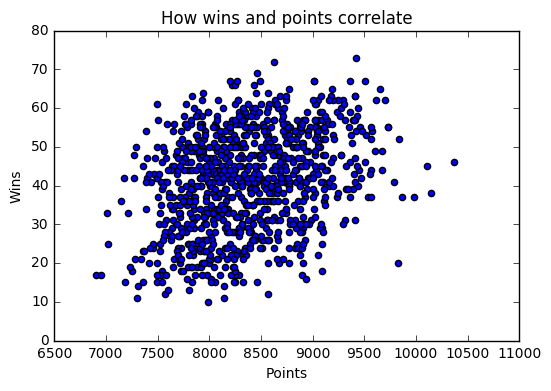

In [81]:
plt.scatter(df.PTS, df.W) #scatter plot
plt.title('How wins and points correlate')
plt.xlabel('Points')
plt.ylabel('Wins')

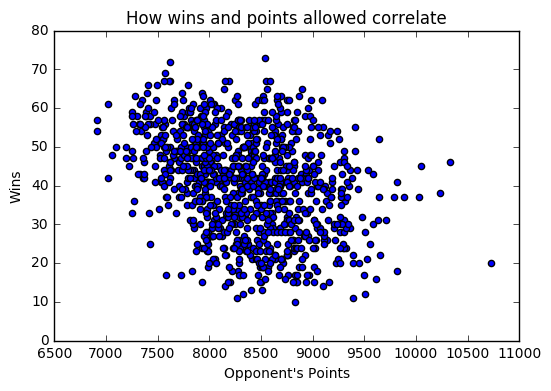

In [83]:
plt.scatter(df['OppPTS'], df.W)
plt.title('How wins and points allowed correlate')
plt.xlabel("Opponent's Points")
plt.ylabel('Wins')

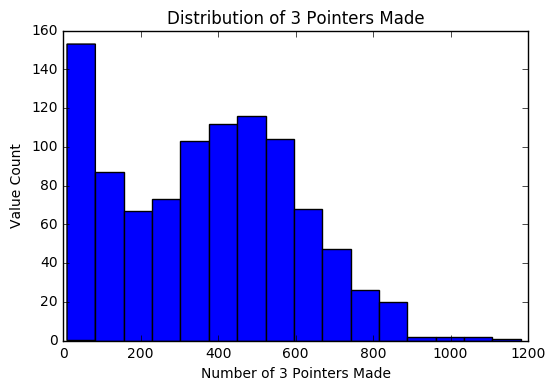

In [134]:
plt.hist(df['3P'], bins='auto') #histogram
plt.title('Distribution of 3 Pointers Made')
plt.xlabel("Number of 3 Pointers Made")
plt.ylabel('Value Count')

value_counts() is a popular function for Pandas DataFrames.  You can see your column values ordered by the number of instances the value appears in the DataFrame.

In [85]:
df.Team.value_counts()

Denver Nuggets                       36
Phoenix Suns                         36
Golden State Warriors                36
Portland Trail Blazers               36
Milwaukee Bucks                      36
Detroit Pistons                      36
Philadelphia 76ers                   36
Utah Jazz                            36
Chicago Bulls                        36
San Antonio Spurs                    36
Cleveland Cavaliers                  36
Atlanta Hawks                        36
Los Angeles Lakers                   36
Houston Rockets                      36
New York Knicks                      36
Dallas Mavericks                     35
Boston Celtics                       35
Indiana Pacers                       35
New Jersey Nets                      31
Los Angeles Clippers                 31
Sacramento Kings                     30
Seattle SuperSonics                  28
Miami Heat                           27
Minnesota Timberwolves               26
Orlando Magic                        26


In [84]:
df.W.value_counts()

41    44
42    42
50    35
44    34
45    31
47    30
55    28
57    26
40    26
43    24
33    24
36    23
37    22
48    22
30    22
56    22
54    22
39    21
49    21
28    21
52    20
53    20
34    20
24    20
38    20
31    19
51    18
26    18
29    18
46    17
      ..
32    15
25    15
21    15
59    15
62    14
58    14
23    13
17    13
20    12
27    12
22    11
19    11
15    11
61    11
60    10
67     7
63     7
18     6
66     3
65     3
64     3
16     3
12     2
11     2
13     2
14     2
73     1
72     1
69     1
10     1
Name: W, dtype: int64

groupby is a powerful function we can use to use aggregate functions on our dataframe.  We groupby by a column(s), then specify an aggregate function (sum, mean, median, product, max, min, etc.) to display.  We lose our ability to index by numbers, but we can use loc to index by our given groupby column (shown later).

In [88]:
d = df.groupby(['Team']).sum()
d

,Year,G,W,L,PTS,OppPTS,2P,Opp2P,2PA,Opp2PA,...,ORB%,ORTG,PL,PW,Pace,SOS,SRS,TOV%,TS%,eFG%
Team,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,71932,2952,1497,1455,297424,297393,100258,101099,208317,209111,...,1095.4,3832.2,1473,1479,3382.2,-1.35,-0.97,511.5,19.179,17.522
Boston Celtics,69919,2870,1652,1218,298583,292163,101302,99675,204513,207409,...,1017.9,3768.5,1241,1629,3357.3,-7.29,71.01,495.7,19.039,17.473
Brooklyn Nets,10075,410,172,238,40823,42150,11894,12488,24232,24978,...,120.2,526.6,247,163,469.4,-1.13,-17.32,69.4,2.698,2.502
Charlotte Bobcats,18083,738,286,452,70319,72891,22176,22207,47640,45340,...,236.1,929.4,457,281,821.7,-1.30,-32.67,123.3,4.693,4.298
Charlotte Hornets,31986,1312,633,679,132791,133931,43875,45077,91937,92386,...,439.7,1701.3,686,626,1513.3,0.55,-13.34,212.8,8.531,7.802
Chicago Bulls,71932,2952,1560,1392,298183,295720,103205,101178,214184,210363,...,1119.4,3823.4,1403,1549,3394.6,-2.27,27.74,515.6,19.129,17.543
Cleveland Cavaliers,71932,2952,1432,1520,295725,296509,100004,101228,209194,209297,...,1072.2,3819.1,1497,1455,3375.1,0.52,-9.07,502.1,19.110,17.534
Dallas Mavericks,69952,2870,1460,1410,295182,295365,97848,100638,202805,204975,...,1009.8,3778.2,1426,1444,3310.8,2.13,-0.09,456.6,18.766,17.184
Denver Nuggets,71932,2952,1406,1546,315205,318051,107248,108337,223056,219741,...,1074.9,3842.1,1565,1387,3573.5,2.30,-32.39,492.2,19.139,17.460


We can sort our dataframe by a column(s).  We would usually have to reset our index, but since we've lost numeric indexing, we don't have to here.

In [90]:
d = d.sort_values(by='PTS', ascending = False)
d

,Year,G,W,L,PTS,OppPTS,2P,Opp2P,2PA,Opp2PA,...,ORB%,ORTG,PL,PW,Pace,SOS,SRS,TOV%,TS%,eFG%
Team,,,,,,,,,,,,,,,,,,,,,
Denver Nuggets,71932,2952,1406,1546,315205,318051,107248,108337,223056,219741,...,1074.9,3842.1,1565,1387,3573.5,2.30,-32.39,492.2,19.139,17.460
Phoenix Suns,71932,2952,1659,1293,314436,308417,106268,105249,212414,217788,...,1042.9,3901.1,1291,1661,3514.9,-1.71,71.74,512.9,19.761,18.222
Golden State Warriors,71932,2952,1349,1603,314049,318032,105162,107993,216629,218334,...,1092.2,3856.1,1611,1341,3548.4,5.39,-43.16,508.2,19.297,17.753
Los Angeles Lakers,71932,2952,1825,1127,312814,304080,106381,105165,211795,218338,...,1092.7,3937.0,1204,1748,3462.7,-3.34,103.20,491.1,19.663,18.153
Portland Trail Blazers,71932,2952,1647,1305,306272,300415,103683,102531,212215,211739,...,1133.9,3892.7,1285,1667,3424.6,-1.18,70.27,504.1,19.360,17.792
San Antonio Spurs,71932,2952,1836,1116,306120,295403,104848,103521,211252,218474,...,1054.7,3887.8,1115,1837,3434.0,-4.23,126.51,505.5,19.648,18.115
Houston Rockets,71932,2952,1619,1333,304089,300168,98878,103583,201516,216474,...,1074.3,3850.8,1336,1616,3441.4,-0.19,47.60,523.2,19.414,17.895
Utah Jazz,71932,2952,1632,1320,301481,296747,104151,97745,210839,205129,...,1076.0,3872.5,1317,1635,3400.6,-1.76,55.95,531.1,19.648,17.911
Milwaukee Bucks,71932,2952,1447,1505,300813,300688,102663,100148,211674,206140,...,1076.1,3842.8,1484,1468,3410.0,-2.12,-0.59,506.8,19.271,17.688


Using brackets within the bracket, we can select certain columns of the DataFrame.

In [91]:
d[['W', 'L', 'PTS', 'OppPTS']]

,W,L,PTS,OppPTS
Team,,,,
Denver Nuggets,1406,1546,315205,318051
Phoenix Suns,1659,1293,314436,308417
Golden State Warriors,1349,1603,314049,318032
Los Angeles Lakers,1825,1127,312814,304080
Portland Trail Blazers,1647,1305,306272,300415
San Antonio Spurs,1836,1116,306120,295403
Houston Rockets,1619,1333,304089,300168
Utah Jazz,1632,1320,301481,296747
Milwaukee Bucks,1447,1505,300813,300688


In [94]:
d1 = d[['W', 'L', 'PTS', 'OppPTS']]
d1 = d1.sort_values(by='W', ascending = False)
d1

,W,L,PTS,OppPTS
Team,,,,
San Antonio Spurs,1836,1116,306120,295403
Los Angeles Lakers,1825,1127,312814,304080
Phoenix Suns,1659,1293,314436,308417
Boston Celtics,1652,1218,298583,292163
Portland Trail Blazers,1647,1305,306272,300415
Utah Jazz,1632,1320,301481,296747
Houston Rockets,1619,1333,304089,300168
Chicago Bulls,1560,1392,298183,295720
Detroit Pistons,1530,1422,297731,295668


We can perform mathematical operations on each row using only the dataframe name and the column name.  We don't even need to go through each individual row:  we can just do it all together.

In [97]:
point_diff = d1.PTS - d1.OppPTS
point_diff

Team
San Antonio Spurs                    10717
Los Angeles Lakers                    8734
Phoenix Suns                          6019
Boston Celtics                        6420
Portland Trail Blazers                5857
Utah Jazz                             4734
Houston Rockets                       3921
Chicago Bulls                         2463
Detroit Pistons                       2063
Atlanta Hawks                           31
Dallas Mavericks                      -183
Milwaukee Bucks                        125
Cleveland Cavaliers                   -784
Indiana Pacers                         617
New York Knicks                      -1546
Philadelphia 76ers                   -3211
Denver Nuggets                       -2846
Golden State Warriors                -3983
Seattle SuperSonics                   4270
Miami Heat                             286
New Jersey Nets                      -5155
Sacramento Kings                     -5406
Los Angeles Clippers                 -7943
Orland

Now, we can simply add a column to the dataframe by giving the column a name, using it as an index of the dataframe, and setting it equal to the list of values.  No hard joining or appending or anything like that.

In [98]:
d1['Point Differential'] = list(point_diff)
d1

,W,L,PTS,OppPTS,Point Differential
Team,,,,,
San Antonio Spurs,1836,1116,306120,295403,10717
Los Angeles Lakers,1825,1127,312814,304080,8734
Phoenix Suns,1659,1293,314436,308417,6019
Boston Celtics,1652,1218,298583,292163,6420
Portland Trail Blazers,1647,1305,306272,300415,5857
Utah Jazz,1632,1320,301481,296747,4734
Houston Rockets,1619,1333,304089,300168,3921
Chicago Bulls,1560,1392,298183,295720,2463
Detroit Pistons,1530,1422,297731,295668,2063


In [99]:
d1[d1['Point Differential'] == max(d1['Point Differential'])]

,W,L,PTS,OppPTS,Point Differential
Team,,,,,
San Antonio Spurs,1836,1116,306120,295403,10717


In [100]:
d1[d1['Point Differential'] == min(d1['Point Differential'])]

,W,L,PTS,OppPTS,Point Differential
Team,,,,,
Los Angeles Clippers,1026,1516,254554,262497,-7943


Below, we use or index, which is now team name. It returns all the row values corresponding to the index.

In [105]:
d1.loc['San Antonio Spurs']

W                       1836
L                       1116
PTS                   306120
OppPTS                295403
Point Differential     10717
Name: San Antonio Spurs, dtype: int64

In [131]:
d1['PTS']

Team
San Antonio Spurs                    306120
Los Angeles Lakers                   312814
Phoenix Suns                         314436
Boston Celtics                       298583
Portland Trail Blazers               306272
Utah Jazz                            301481
Houston Rockets                      304089
Chicago Bulls                        298183
Detroit Pistons                      297731
Atlanta Hawks                        297424
Dallas Mavericks                     295182
Milwaukee Bucks                      300813
Cleveland Cavaliers                  295725
Indiana Pacers                       292585
New York Knicks                      296408
Philadelphia 76ers                   298173
Denver Nuggets                       315205
Golden State Warriors                314049
Seattle SuperSonics                  238960
Miami Heat                           215907
New Jersey Nets                      254778
Sacramento Kings                     251409
Los Angeles Clippers       

In [132]:
max(d1.PTS)

315205

In [106]:
d1.loc['San Antonio Spurs'].W

1836

We can make copies of our dataframe.

In [107]:
new_df = df
new_df

,Year,Team,G,W,L,PTS,OppPTS,2P,Opp2P,2PA,...,ORB%,ORTG,PL,PW,Pace,SOS,SRS,TOV%,TS%,eFG%
0,2017,Utah Jazz,82,51,31,8258,7935,2242,2307,4387,...,23.2,109.6,30,52,91.6,0.06,4.00,13.2,0.563,0.526
1,2017,San Antonio Spurs,82,61,21,8637,8047,2469,2364,4937,...,24.0,111.1,22,60,94.2,-0.06,7.13,12.6,0.564,0.524
2,2017,Memphis Grizzlies,82,43,39,8239,8199,2217,2051,4685,...,24.8,107.7,40,42,92.3,0.47,0.96,12.1,0.535,0.491
3,2017,Dallas Mavericks,82,33,49,8029,8269,2090,2247,4277,...,18.1,105.6,49,33,92.2,0.40,-2.53,11.6,0.541,0.505
4,2017,Miami Heat,82,41,41,8460,8373,2394,2469,4824,...,24.2,107.8,38,44,95.2,-0.29,0.77,12.4,0.541,0.512
5,2017,Chicago Bulls,82,41,41,8435,8400,2546,2505,5310,...,27.0,107.4,40,42,95.3,-0.39,0.03,12.3,0.530,0.487
6,2017,Detroit Pistons,82,37,45,8309,8401,2638,2377,5367,...,24.1,106.0,44,38,95.0,-0.17,-1.29,10.9,0.521,0.492
7,2017,Toronto Raptors,82,51,31,8762,8417,2486,2258,4922,...,25.0,112.3,30,52,94.7,-0.56,3.65,11.8,0.561,0.517
8,2017,Milwaukee Bucks,82,42,40,8497,8512,2462,2300,4769,...,21.5,109.1,42,40,94.5,-0.26,-0.45,13.2,0.565,0.527
9,2017,Atlanta Hawks,82,43,39,8459,8529,2394,2285,4781,...,23.6,104.9,43,39,97.4,-0.38,-1.23,14.2,0.541,0.504


In [109]:
new_df.Team[0]

u'Utah Jazz'

We can individually set values of our dataframe to a given value.

In [110]:
new_df.Team[0] = 'Utah'
new_df

C:\Users\cglas\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Year,Team,G,W,L,PTS,OppPTS,2P,Opp2P,2PA,...,ORB%,ORTG,PL,PW,Pace,SOS,SRS,TOV%,TS%,eFG%
0,2017,Utah,82,51,31,8258,7935,2242,2307,4387,...,23.2,109.6,30,52,91.6,0.06,4.00,13.2,0.563,0.526
1,2017,San Antonio Spurs,82,61,21,8637,8047,2469,2364,4937,...,24.0,111.1,22,60,94.2,-0.06,7.13,12.6,0.564,0.524
2,2017,Memphis Grizzlies,82,43,39,8239,8199,2217,2051,4685,...,24.8,107.7,40,42,92.3,0.47,0.96,12.1,0.535,0.491
3,2017,Dallas Mavericks,82,33,49,8029,8269,2090,2247,4277,...,18.1,105.6,49,33,92.2,0.40,-2.53,11.6,0.541,0.505
4,2017,Miami Heat,82,41,41,8460,8373,2394,2469,4824,...,24.2,107.8,38,44,95.2,-0.29,0.77,12.4,0.541,0.512
5,2017,Chicago Bulls,82,41,41,8435,8400,2546,2505,5310,...,27.0,107.4,40,42,95.3,-0.39,0.03,12.3,0.530,0.487
6,2017,Detroit Pistons,82,37,45,8309,8401,2638,2377,5367,...,24.1,106.0,44,38,95.0,-0.17,-1.29,10.9,0.521,0.492
7,2017,Toronto Raptors,82,51,31,8762,8417,2486,2258,4922,...,25.0,112.3,30,52,94.7,-0.56,3.65,11.8,0.561,0.517
8,2017,Milwaukee Bucks,82,42,40,8497,8512,2462,2300,4769,...,21.5,109.1,42,40,94.5,-0.26,-0.45,13.2,0.565,0.527
9,2017,Atlanta Hawks,82,43,39,8459,8529,2394,2285,4781,...,23.6,104.9,43,39,97.4,-0.38,-1.23,14.2,0.541,0.504


In [111]:
df[df.W >= 63]

,Year,Team,G,W,L,PTS,OppPTS,2P,Opp2P,2PA,...,ORB%,ORTG,PL,PW,Pace,SOS,SRS,TOV%,TS%,eFG%
10,2017,Golden State Warriors,82,67,15,9503,8549,2550,2444,4578,...,22.8,115.6,15,67,99.8,-0.28,11.35,13.2,0.597,0.563
30,2016,San Antonio Spurs,82,67,15,8490,7618,2719,2387,5279,...,23.0,110.3,15,67,93.8,-0.36,10.28,12.4,0.564,0.526
48,2016,Golden State Warriors,82,73,9,9421,8539,2412,2548,4567,...,23.5,114.5,17,65,99.3,-0.38,10.38,13.5,0.593,0.563
74,2015,Golden State Warriors,82,67,15,9016,8188,2527,2439,4920,...,24.1,111.6,17,65,98.3,-0.09,10.01,13.1,0.571,0.540
123,2013,Miami Heat,82,66,16,8436,7791,2431,2295,4539,...,22.2,112.3,20,62,90.7,-0.84,7.03,13.7,0.588,0.552
208,2009,Cleveland Cavaliers,82,66,16,8223,7491,2366,2293,4784,...,27.7,112.4,17,65,88.7,-0.25,8.68,12.5,0.560,0.519
220,2009,Los Angeles Lakers,82,65,17,8768,8140,2760,2464,5465,...,29.4,112.8,21,61,94.3,-0.55,7.11,12.3,0.555,0.513
239,2008,Boston Celtics,82,66,16,8245,7404,2390,2172,4722,...,26.6,110.2,15,67,90.9,-0.95,9.30,14.7,0.569,0.522
271,2007,Dallas Mavericks,82,67,15,8201,7609,2475,2415,5038,...,28.7,111.3,21,61,89.5,0.06,7.28,13.4,0.559,0.509
299,2006,San Antonio Spurs,82,63,19,7837,7278,2469,2482,4980,...,26.0,107.3,21,61,88.5,-0.13,6.69,13.6,0.546,0.513


We can find aggregate statistics of columns of our dataframe.

In [112]:
np.mean(df['eFG%']) #numpy library, incredibly useful

0.49085350966429364

In [113]:
np.mean(df['PTS'])

8363.90946083418

In [114]:
min(df.PTS)

6901

In [115]:
min(df.W)

10

We can trim our dataframe by dropping some columns rather than including a whole bunch of them.

In [119]:
std_df = df.drop(['Year', 'Team', 'W', 'L', 'G'], axis=1) #axis = 1 corresponds to the columns
std_df

,PTS,OppPTS,2P,Opp2P,2PA,Opp2PA,Opp2P%,Opp3P,Opp3P%,Opp3PA,...,ORB%,ORTG,PL,PW,Pace,SOS,SRS,TOV%,TS%,eFG%
0,8258,7935,2242,2307,4387,4849,0.476,671,0.358,1874,...,23.2,109.6,30,52,91.6,0.06,4.00,13.2,0.563,0.526
1,8637,8047,2469,2364,4937,4897,0.483,668,0.344,1942,...,24.0,111.1,22,60,94.2,-0.06,7.13,12.6,0.564,0.524
2,8239,8199,2217,2051,4685,4166,0.492,813,0.354,2299,...,24.8,107.7,40,42,92.3,0.47,0.96,12.1,0.535,0.491
3,8029,8269,2090,2247,4277,4403,0.510,788,0.380,2074,...,18.1,105.6,49,33,92.2,0.40,-2.53,11.6,0.541,0.505
4,8460,8373,2394,2469,4824,5040,0.490,639,0.343,1864,...,24.2,107.8,38,44,95.2,-0.29,0.77,12.4,0.541,0.512
5,8435,8400,2546,2505,5310,4978,0.503,731,0.345,2121,...,27.0,107.4,40,42,95.3,-0.39,0.03,12.3,0.530,0.487
6,8309,8401,2638,2377,5367,4732,0.502,767,0.366,2098,...,24.1,106.0,44,38,95.0,-0.17,-1.29,10.9,0.521,0.492
7,8762,8417,2486,2258,4922,4561,0.495,794,0.354,2240,...,25.0,112.3,30,52,94.7,-0.56,3.65,11.8,0.561,0.517
8,8497,8512,2462,2300,4769,4490,0.512,816,0.353,2312,...,21.5,109.1,42,40,94.5,-0.26,-0.45,13.2,0.565,0.527
9,8459,8529,2394,2285,4781,4653,0.491,893,0.357,2502,...,23.6,104.9,43,39,97.4,-0.38,-1.23,14.2,0.541,0.504


We can perform mathematical operations on our dataframe values with aggregate column values.  Below is how we standardize our data, which is crucial for machine learning analysis.

In [120]:
std_df = (std_df - std_df.mean())/std_df.std()
std_df

,PTS,OppPTS,2P,Opp2P,2PA,Opp2PA,Opp2P%,Opp3P,Opp3P%,Opp3PA,...,ORB%,ORTG,PL,PW,Pace,SOS,SRS,TOV%,TS%,eFG%
0,-0.190325,-0.767623,-1.289990,-1.139737,-1.667612,-1.151653,-0.409757,1.399979,0.581367,1.417814,...,-1.633869,0.826334,-0.899325,0.899325,-0.696518,0.148450,0.895136,-0.724206,1.441400e+00,1.749506
1,0.490759,-0.567322,-0.778751,-1.011813,-1.022643,-1.094053,-0.052446,1.385913,0.239571,1.536776,...,-1.427424,1.230523,-1.557152,1.557152,-0.169266,-0.152016,1.595050,-1.212642,1.492879e+00,1.649950
2,-0.224469,-0.295485,-1.346294,-1.714272,-1.318156,-1.971253,0.406953,2.065741,0.483711,2.161324,...,-1.220978,0.314360,-0.077042,0.077042,-0.554566,1.175040,0.215348,-1.619671,5.715269e-15,0.007292
3,-0.601851,-0.170297,-1.632317,-1.274394,-1.796605,-1.686853,1.325753,1.948530,1.118477,1.767701,...,-2.949958,-0.251505,0.663013,-0.663013,-0.574845,0.999768,-0.565067,-2.026701,3.088714e-01,0.704177
4,0.172680,0.015697,-0.947662,-0.776164,-1.155155,-0.922453,0.304864,1.249947,0.215157,1.400320,...,-1.375812,0.341306,-0.241499,0.241499,0.033523,-0.727908,0.172861,-1.375453,3.088714e-01,1.052620
5,0.127754,0.063984,-0.605335,-0.695370,-0.585237,-0.996853,0.968442,1.681287,0.263985,1.849924,...,-0.653254,0.233523,-0.077042,0.077042,0.053802,-0.978295,0.007386,-1.456859,-2.573929e-01,-0.191818
6,-0.098675,0.065772,-0.398136,-0.982637,-0.518395,-1.292053,0.917398,1.850072,0.776680,1.809687,...,-1.401618,-0.143721,0.251871,-0.251871,-0.007035,-0.427442,-0.287785,-2.596542,-7.207000e-01,0.057069
7,0.715391,0.094387,-0.740464,-1.249707,-1.040233,-1.497253,0.560087,1.976661,0.483711,2.058107,...,-1.169367,1.553875,-0.899325,0.899325,-0.067871,-1.403955,0.816871,-1.863889,1.338443e+00,1.301508
8,0.239171,0.264285,-0.794516,-1.155447,-1.219652,-1.582453,1.427842,2.079807,0.459297,2.184066,...,-2.072565,0.691604,0.087415,-0.087415,-0.108429,-0.652791,-0.099949,-0.724206,1.544357e+00,1.799283
9,0.170883,0.294688,-0.947662,-1.189111,-1.205580,-1.386853,0.355909,2.440819,0.556953,2.516459,...,-1.530646,-0.440127,0.169643,-0.169643,0.479660,-0.953257,-0.274368,0.089853,3.088714e-01,0.654400


Finally, we can write our dataframes to Excel Spreadsheets, CSV files, or even to the SQL data warehouse of your particular company. Please talk to me if you are interested in the SQL stuff.

In [ ]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('standardized_nba_team_stats.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
std_df.to_excel(writer)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

## Exercises
1.  Find the teams with the second, third, and fourth fewest wins.
2.  Group the dataframe by year, then find the year where the most points were scored.
3.  Create and add a column called "eFGM", which is eFG% * FG.
4.  Set all values in PTS to 0 that are less than or equal to the New York Knicks' point total from 2014, and keep all other values of PTS the same (Hint:  We cannot directly index this time.  You have to loop through each row and set each point total individually.

Below is some code I wrote to loop through different URL's from basketball-reference.com and scrape all the regular season box score data from 1986-2017.  Then, I put that data into a dataframe and cleaned it up a bit.  This does take a bit of time to run, as it goes through a lot of data, so be advised before running.  However, it could be useful data for you, and it combines the web scraping stuff and dataframe stuff that we go over here.  I have not had the chance to comment it as much as I'd like, and there is some stuff I haven't gone over, so feel free to ask me about it if you're curious!

In [ ]:
visitors = []
home = []
date = []
season = []
home_pts = []
visitor_pts = []

yr = 2017
while yr >= 1986:
    try:
        url = "https://www.basketball-reference.com/leagues/NBA_"+str(yr)+"_games-october.html"
        response = requests.get(url)
        soup = BeautifulSoup(response.content)
        soup2 = soup.find('table', {'id': 'schedule'})
        soup3 = soup2.findAll('td', {'data-stat': 'box_score_text'})
        soup4 = soup2.findAll('td', {'data-stat': 'visitor_team_name'})
        soup5 = soup2.findAll('td', {'data-stat': 'home_team_name'})
        soup6 = soup2.findAll('th', {'data-stat': 'date_game'})
        soup7 = soup2.findAll('td', {'data-stat': 'home_pts'})
        soup8 = soup2.findAll('td', {'data-stat': 'visitor_pts'})
        for i in range(len(soup4)):
            visitors.append(soup4[i].get_text().strip())
            home.append(soup5[i].get_text().strip())
            m = datetime.datetime.strptime('October ' + re.search('\w+ (\d+, \d\d\d\d)', soup6[i+1].get_text().strip()).group(1), '%B %d, %Y')
            date.append(datetime.date.strftime(m, '%Y-%m-%d'))
            season.append(yr)
            home_pts.append(soup7[i].get_text().strip())
            visitor_pts.append(soup8[i].get_text().strip())
        print "October " + str(yr)
    except:
        pass
            
    try:        
        url = "https://www.basketball-reference.com/leagues/NBA_"+str(yr)+"_games-november.html"
        response = requests.get(url)
        soup = BeautifulSoup(response.content)
        soup2 = soup.find('table', {'id': 'schedule'})
        soup3 = soup2.findAll('td', {'data-stat': 'box_score_text'})
        soup4 = soup2.findAll('td', {'data-stat': 'visitor_team_name'})
        soup5 = soup2.findAll('td', {'data-stat': 'home_team_name'})
        soup6 = soup2.findAll('th', {'data-stat': 'date_game'})
        soup7 = soup2.findAll('td', {'data-stat': 'home_pts'})
        soup8 = soup2.findAll('td', {'data-stat': 'visitor_pts'})
        for i in range(len(soup4)):
            visitors.append(soup4[i].get_text().strip())
            home.append(soup5[i].get_text().strip())
            m = datetime.datetime.strptime('November ' + re.search('\w+ (\d+, \d\d\d\d)', soup6[i+1].get_text().strip()).group(1), '%B %d, %Y')
            date.append(datetime.date.strftime(m, '%Y-%m-%d'))
            season.append(yr)
            home_pts.append(soup7[i].get_text().strip())
            visitor_pts.append(soup8[i].get_text().strip())
        print "November " + str(yr)
    except:
        pass
            
    try:        
        url = "https://www.basketball-reference.com/leagues/NBA_"+str(yr)+"_games-december.html"
        response = requests.get(url)
        soup = BeautifulSoup(response.content)
        soup2 = soup.find('table', {'id': 'schedule'})
        soup3 = soup2.findAll('td', {'data-stat': 'box_score_text'})
        soup4 = soup2.findAll('td', {'data-stat': 'visitor_team_name'})
        soup5 = soup2.findAll('td', {'data-stat': 'home_team_name'})
        soup6 = soup2.findAll('th', {'data-stat': 'date_game'})
        soup7 = soup2.findAll('td', {'data-stat': 'home_pts'})
        soup8 = soup2.findAll('td', {'data-stat': 'visitor_pts'})
        for i in range(len(soup4)):
            visitors.append(soup4[i].get_text().strip())
            home.append(soup5[i].get_text().strip())
            m = datetime.datetime.strptime('December ' + re.search('\w+ (\d+, \d\d\d\d)', soup6[i+1].get_text().strip()).group(1), '%B %d, %Y')
            date.append(datetime.date.strftime(m, '%Y-%m-%d'))
            season.append(yr)
            home_pts.append(soup7[i].get_text().strip())
            visitor_pts.append(soup8[i].get_text().strip())
        print "December " + str(yr)
    except:
        pass
            
    try:        
        url = "https://www.basketball-reference.com/leagues/NBA_"+str(yr)+"_games-january.html"
        response = requests.get(url)
        soup = BeautifulSoup(response.content)
        soup2 = soup.find('table', {'id': 'schedule'})
        soup3 = soup2.findAll('td', {'data-stat': 'box_score_text'})
        soup4 = soup2.findAll('td', {'data-stat': 'visitor_team_name'})
        soup5 = soup2.findAll('td', {'data-stat': 'home_team_name'})
        soup6 = soup2.findAll('th', {'data-stat': 'date_game'})
        soup7 = soup2.findAll('td', {'data-stat': 'home_pts'})
        soup8 = soup2.findAll('td', {'data-stat': 'visitor_pts'})
        for i in range(len(soup4)):
            visitors.append(soup4[i].get_text().strip())
            home.append(soup5[i].get_text().strip())
            m = datetime.datetime.strptime('January ' + re.search('\w+ (\d+, \d\d\d\d)', soup6[i+1].get_text().strip()).group(1), '%B %d, %Y')
            date.append(datetime.date.strftime(m, '%Y-%m-%d'))
            season.append(yr)
            home_pts.append(soup7[i].get_text().strip())
            visitor_pts.append(soup8[i].get_text().strip())
        print "January " + str(yr)
    except:
        pass
            
      
    url = "https://www.basketball-reference.com/leagues/NBA_"+str(yr)+"_games-february.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.content)
    soup2 = soup.find('table', {'id': 'schedule'})
    soup3 = soup2.findAll('td', {'data-stat': 'box_score_text'})
    soup4 = soup2.findAll('td', {'data-stat': 'visitor_team_name'})
    soup5 = soup2.findAll('td', {'data-stat': 'home_team_name'})
    soup6 = soup2.findAll('th', {'data-stat': 'date_game'})
    soup7 = soup2.findAll('td', {'data-stat': 'home_pts'})
    soup8 = soup2.findAll('td', {'data-stat': 'visitor_pts'})
    for i in range(len(soup4)):
        visitors.append(soup4[i].get_text().strip())
        home.append(soup5[i].get_text().strip())
        m = datetime.datetime.strptime('February ' + re.search('\w+ (\d+, \d\d\d\d)', soup6[i+1].get_text().strip()).group(1), '%B %d, %Y')
        date.append(datetime.date.strftime(m, '%Y-%m-%d'))
        season.append(yr)
        home_pts.append(soup7[i].get_text().strip())
        visitor_pts.append(soup8[i].get_text().strip())
    print "February " + str(yr)
            
      
    url = "https://www.basketball-reference.com/leagues/NBA_"+str(yr)+"_games-march.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.content)
    soup2 = soup.find('table', {'id': 'schedule'})
    soup3 = soup2.findAll('td', {'data-stat': 'box_score_text'})
    soup4 = soup2.findAll('td', {'data-stat': 'visitor_team_name'})
    soup5 = soup2.findAll('td', {'data-stat': 'home_team_name'})
    soup6 = soup2.findAll('th', {'data-stat': 'date_game'})
    soup7 = soup2.findAll('td', {'data-stat': 'home_pts'})
    soup8 = soup2.findAll('td', {'data-stat': 'visitor_pts'})
    for i in range(len(soup4)):
        visitors.append(soup4[i].get_text().strip())
        home.append(soup5[i].get_text().strip())
        m = datetime.datetime.strptime('March ' + re.search('\w+ (\d+, \d\d\d\d)', soup6[i+1].get_text().strip()).group(1), '%B %d, %Y')
        date.append(datetime.date.strftime(m, '%Y-%m-%d'))
        season.append(yr)
        home_pts.append(soup7[i].get_text().strip())
        visitor_pts.append(soup8[i].get_text().strip())
    print "March " + str(yr)
            
            
    url = "https://www.basketball-reference.com/leagues/NBA_"+str(yr)+"_games-april.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.content)
    soup2 = soup.find('table', {'id': 'schedule'})
    soup3 = soup2.findAll('tr')
    j = 0
    if yr != 1999:
        while soup3[j].find('th').get_text().strip() != 'Playoffs':
            j = j+1
        soup3 = soup2.findAll('td', {'data-stat': 'box_score_text'})
        soup4 = soup2.findAll('td', {'data-stat': 'visitor_team_name'})
        soup5 = soup2.findAll('td', {'data-stat': 'home_team_name'})
        soup6 = soup2.findAll('th', {'data-stat': 'date_game'})
        soup7 = soup2.findAll('td', {'data-stat': 'home_pts'})
        soup8 = soup2.findAll('td', {'data-stat': 'visitor_pts'})
        for i in range(j):
            visitors.append(soup4[i].get_text().strip())
            home.append(soup5[i].get_text().strip())
            m = datetime.datetime.strptime('April ' + re.search('\w+ (\d+, \d\d\d\d)', soup6[i+1].get_text().strip()).group(1), '%B %d, %Y')
            date.append(datetime.date.strftime(m, '%Y-%m-%d'))
            season.append(yr)
            home_pts.append(soup7[i].get_text().strip())
            visitor_pts.append(soup8[i].get_text().strip())
        print "April " + str(yr)
    else:
        soup3 = soup2.findAll('td', {'data-stat': 'box_score_text'})
        soup4 = soup2.findAll('td', {'data-stat': 'visitor_team_name'})
        soup5 = soup2.findAll('td', {'data-stat': 'home_team_name'})
        soup6 = soup2.findAll('th', {'data-stat': 'date_game'})
        soup7 = soup2.findAll('td', {'data-stat': 'home_pts'})
        soup8 = soup2.findAll('td', {'data-stat': 'visitor_pts'})
        for i in range(len(soup4)):
            visitors.append(soup4[i].get_text().strip())
            home.append(soup5[i].get_text().strip())
            m = datetime.datetime.strptime('April ' + re.search('\w+ (\d+, \d\d\d\d)', soup6[i+1].get_text().strip()).group(1), '%B %d, %Y')
            date.append(datetime.date.strftime(m, '%Y-%m-%d'))
            season.append(yr)
            home_pts.append(soup7[i].get_text().strip())
            visitor_pts.append(soup8[i].get_text().strip())
        print "April " + str(yr)
        
        
        url = "https://www.basketball-reference.com/leagues/NBA_"+str(yr)+"_games-may.html"
        response = requests.get(url)
        soup = BeautifulSoup(response.content)
        soup2 = soup.find('table', {'id': 'schedule'})
        soup3 = soup2.findAll('tr')
        j = 0
        while soup3[j].find('th').get_text().strip() != 'Playoffs':
            j = j+1
        soup3 = soup2.findAll('td', {'data-stat': 'box_score_text'})
        soup4 = soup2.findAll('td', {'data-stat': 'visitor_team_name'})
        soup5 = soup2.findAll('td', {'data-stat': 'home_team_name'})
        soup6 = soup2.findAll('th', {'data-stat': 'date_game'})
        soup7 = soup2.findAll('td', {'data-stat': 'home_pts'})
        soup8 = soup2.findAll('td', {'data-stat': 'visitor_pts'})
        for i in range(j):
            visitors.append(soup4[i].get_text().strip())
            home.append(soup5[i].get_text().strip())
            m = datetime.datetime.strptime('May ' + re.search('\w+ (\d+, \d\d\d\d)', soup6[i+1].get_text().strip()).group(1), '%B %d, %Y')
            date.append(datetime.date.strftime(m, '%Y-%m-%d'))
            season.append(yr)
            home_pts.append(soup7[i].get_text().strip())
            visitor_pts.append(soup8[i].get_text().strip())
        print "May " + str(yr)
    yr = yr - 1

In [ ]:
from collections import OrderedDict
df = OrderedDict([('Season', season), ('Date', date), ('Home', home), ('Home PTS', home_pts), ('Visitor', visitors), ('Visitor PTS', visitor_pts)])
df = pd.DataFrame(df).sort_values(by='Date', ascending = True).reset_index(drop = True)
df

In [ ]:
df = df.apply(pd.to_numeric, errors = 'ignore')
df

In [ ]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('nba_box_scores.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df.to_excel(writer)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

# Machine Learning
Machine Learning is one of the most useful tools today.  When used intelligently, it makes accurate predictions that allow us to make smarter decisions.  Here is an example of using our NBA Team Data dataframes with a random forest regressor.  I have worked on some other machine learning algorithms and code as well, so feel free to reach out!

In [140]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold

ns = np.arange(1, 51, 1)
cv_scores = []

X = std_df[['PTS', 'OppPTS']].as_matrix()
Y = df.W.as_matrix()
# perform 10-fold cross validation
#cross validation helps get a better 'average' label of our data.  Since our training data and test data are split into smaller, random groups, the model can be based on a group that might not reflect all of the data accurately.  So, we split our data into smaller, independent folds and come up with an average label.
for n in ns:
    result = 0.
    nfold = 5
    rf = RandomForestRegressor(n_estimators=n)
    for train, test in KFold(nfold).split(X):
        model = rf.fit(X[train], Y[train])
        result += rf.score(X[test], Y[test])
    cv_scores.append(result/nfold)

The optimal number of estimators is 39


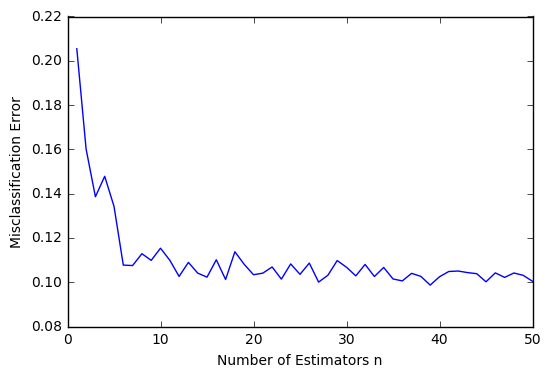

In [141]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_n = ns[MSE.index(min(MSE))]
print "The optimal number of estimators is %d" % optimal_n

# plot misclassification error vs k
plt.plot(ns, MSE)
plt.xlabel('Number of Estimators n')
plt.ylabel('Misclassification Error')
plt.show()

In [142]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y)
clf = RandomForestRegressor(n_estimators=optimal_n)
clf.fit(xtrain, ytrain)
print (clf.score(xtrain, ytrain), clf.score(xtest, ytest))

(0.98723513030733778, 0.90922532000846024)


In [143]:
ypreds = clf.predict(xtest)
ypreds

array([ 35.92307692,  31.43589744,  25.28205128,  47.35897436,
        49.84615385,  41.92307692,  58.38461538,  24.38461538,
        39.92307692,  41.74358974,  43.64102564,  51.71794872,
        26.69230769,  16.38461538,  47.41025641,  48.07692308,
        15.82051282,  42.84615385,  58.92307692,  39.28205128,
        52.94871795,  47.07692308,  39.43589744,  45.20512821,
        23.92307692,  37.53846154,  53.07692308,  20.25641026,
        46.28205128,  46.12820513,  37.48717949,  36.23076923,
        55.25641026,  35.35897436,  41.74358974,  45.1025641 ,
        39.58974359,  50.66666667,  50.94871795,  37.46153846,
        38.15384615,  44.35897436,  37.69230769,  41.74358974,
        36.97435897,  55.71794872,  54.12820513,  48.48717949,
        16.79487179,  30.43589744,  14.64102564,  30.97435897,
        25.07692308,  46.05128205,  61.43589744,  23.51282051,
        28.84615385,  44.1025641 ,  41.23076923,  51.20512821,
        42.20512821,  42.48717949,  58.35897436,  40.07

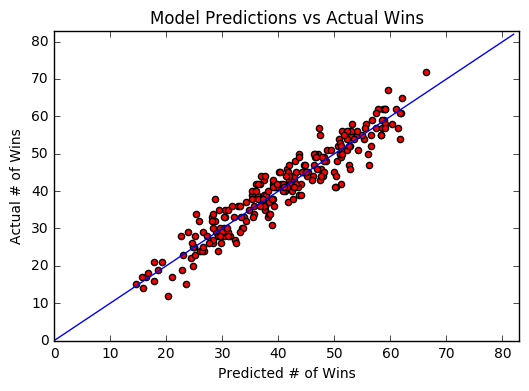

In [144]:
Xs = np.arange(0, 83, 1)
Ys = np.arange(0, 83, 1)
plt.plot(Xs, Ys)
plt.scatter(ypreds, ytest, c='red')
plt.xlim(0, 83)
plt.ylim(0, 83)
plt.title('Model Predictions vs Actual Wins')
plt.xlabel('Predicted # of Wins')
plt.ylabel('Actual # of Wins')